In [13]:
import numpy as np

### 4.1 Sorted Array Multiple Search Problem

- Sorted Array Multiple Search Problem: Search multiple keys in a sorted sequence of keys.
    - **Input:** The first two lines of the input contain an integer $n$ and a sequence $k_0 \lt k_1 \lt ... \lt k_{n−1}$ of $n$ distinct positive integers in increasing order. The next two lines contain an integer $m$ and $m$ positive integers $q_{0},q_{1},...,q_{m−1}$
    - **Output:** For all $i$ from 0 to $m−1$, output an index $0 \le j \le n−1$ such that $k_j = q_i$, or −1, if there is no such index.
    - **Constraints:** $1 \le n \le 3 \cdot 10^4$; $1 \le m \le 10^5$; $1 \le k_i \le 10^9$ for all $0 \le i \le n$; $1 \le q_j \le 10^9$ for all $0 \le j \le m$
    - **Sample:**
        - 5 (Sequence length size)
        - 1 5 8 12 13 (Sequence)
        - 5 (Count of values to find)
        - 8 1 23 1 11 (Values to find)
        - Output: 2 0 -1 0 -1

In [18]:
def binary_search_recursive(keys, query, left, right):
    index = -1
    mid = (left+right)//2

    if keys[mid] == query:
        return mid

    if left >= right:
        return -1

    if keys[mid] < query:
        left = mid+1
        return binary_search_recursive(keys, query, left, right)
     
    if query < keys[mid]:
        right = mid-1
        return binary_search_recursive(keys, query, left, right)

def binary_search_iterative(keys, query):
    left = 0
    right = len(keys)

    while left < right:
        mid = (left+right)//2

        if keys[mid] == query:
            return mid
        elif keys[mid] < query:
            left = mid+1
        elif keys[mid] > query:
            right = mid-1
    
    return -1

def binary_search(keys, query):
    return binary_search_recursive(keys, query, 0, len(keys)-1)

input_keys = [1,5,8,12,13]
input_queries = [8,1,23,1,11]

# n = np.random.randint(1, 3e4)
# m = np.random.randint(1, 1e6)
# input_keys = list(np.random.randint(0, 1e10, n))
# input_queries = list(np.random.randint(0, 1e10, m))

for q in input_queries:
    print(binary_search(input_keys, q), end=' ')
print(' ')
for q in input_queries:
    print(binary_search_iterative(input_keys, q), end=' ')

2 0 -1 0 -1  
2 0 -1 0 -1 

### 4.2 Binary Search with Duplicates

- Binary Search with Duplicates Problem: Find the index of the first occurrence of a key in a sorted array
    - **Input:** The first two lines of the input contain an integer $n$ and a sequence $k_0 \le k_1 \le ... \le k_{n-1}$ of $n$ positive integers in non-decreasing order. The next two lines contain an integer $m$ and $m$ positive integers $q_0, q_1, ... q_{m-1}$
    - **Output:** For all $i$ from 0 to $m-1$, output the index $0 \le j \le n-1$ of the first occurrence of $q_i$ (i.e. k_j = q_i) or -1, if there is no such index
    - **Constraints:** $1 \le n \le 3 \cdot 10^4; 1 \le m \le 10^5; 1 \le k_i \le 10^9$ for all $0 \le i \le n$; $1 \le q_j \le 10^9$ for all $0 \le j \le m$

In [33]:
def binary_search(keys, query):

    ## init left and right pointers
    left = 0
    right = len(keys)-1
    retval = -1

    while left <= right:
        # print(f"{left=}, {right=}")
        mid = (left+right)//2
        if keys[mid] == query:
            retval = mid
            right=mid-1
        elif keys[mid] > query:
            right=mid-1
        elif keys[mid] < query:
            left=mid+1
    
    return retval
    
input_keys = [2,4,4,4,7,7,9]
input_queries = [9,4,5,2]
# input_queries = [2]
# input_keys = [1, 2, 3, 4, 5, 6, 7, 8]
# input_queries = [10, 10, 10, 10, 10, 10, 10, 10]

for q in input_queries:
    print(binary_search(input_keys, q), end=' ')

6 1 -1 0 

### 4.3 Majority Element

- Check whether a given sequence of numbers contains an element that appears more than half of the times
    - **Input** The first line contains an integer $n$, the next one contains a sequence of n non-negative integers. $a_0,...,a_{n−1}$
    - **Output** Output 1 if the sequence contains an element that appears more than $\frac{n}{2}$ times, and 0 otherwise
    - **Constraints** $1 \le n \le 10^5$; $0 \le a_i \le 10^9$ for all $0 \le i \le n$
    - **Sample**
        1. 2 3 9 2 2 --> 1
        2. 1 2 3 1 --> 0

- There are a LOT of ways to do this. We'll go through them all here

#### 4.3.1 Brute force

- The most obvious (and compute terrible) way to do this is by brute force

- We loop over every number in the array, and check the number of times it appears

In [3]:
input_array = [2,3,9,2,2]

def majority_brute_force(input_array):
    '''
    Time complexity: O(N log(N)) + O(N) because you loop over the entire list. 
        - Hashmap insertion is O(log N), which we do N times. 
        - We loop across the array of size N, leading to another O(N) operation
    Space complexity: O(N) because of the hashmap needed to store the values and counts
    '''
    store_val = {}
    target = (len(input_array) // 2) + 1
    for elem in input_array:
        if elem not in store_val.keys(): 
            store_val[elem] = 1
        else:
            store_val[elem] += 1
        if store_val[elem] >= target:
            return 1
    return 0
        
majority_brute_force([2,3,9,1,2])

0

### 4.3.2 Moore's Voting Algorithm

- Rather than the brute force solution to count all elements above, there is a more elegant approach

- We iterate through the array and maintain 2 values; (i) the current guess of majority element; and (ii) excess count, i.e. the number that the current majority element exceeds the other elements by

- At the end, whatever the current majority element is becomes our majority candidate, and we loop over the array once more to count the majority candidate

- If the count exceeds $\frac{n}{2}$, then it is the majority element. Else, no majority element exists

In [6]:
input_array = [2,3,9,2,2]

def majority_moores(input_array):
    '''
    Time complexity: O(N) for the initial loop, and another O(N) for the second loop, for an overall O(N)
    Space complexity: O(1), because constant data is stored
    '''

    majority_element = None
    count_majority_excess = 0
    for elem in input_array:
        if count_majority_excess == 0:
            majority_element = elem
            count_majority_excess += 1
        elif elem == majority_element:
            count_majority_excess += 1
        elif elem != majority_element:
            count_majority_excess -= 1
    
    check_majority = 0
    for elem in input_array:
        if elem == majority_element:
            check_majority += 1
    
    if check_majority >= ((len(input_array)//2)+1):
        return 1
    else:
        return 0

majority_moores(input_array)

1

### 4.4 Speeding up RandomizedQuickSort

- Sort a given sequence of numbers (that may contain duplicates) using a modification of RandomizedQuickSort that works in $O(n \log n)$ expected time
    - **Input:** An integer array with $n$ elements that may contain duplicates
    - **Output:** Sorted array (generated using a modification of RandomizedQuickSort) that works in $O(N \log(N))$ expected time
    

- Recall that Quicksort is slow when there are duplicates in the array (See section 5 notes on Quicksort)
    - This is because, with duplicates, you can end up pivoting on values that are exactly the same as the pivot values, leading to imbalanced splits 
    - This creates $O(N^2)$ worst case run time

- To fix this, we can implement 3-way quicksort as we previously did
    - Maintain a pointer to the end of the left array
    - Maintain a pointer to the start of the right array
    - In the recursive step, ignore the middle part where all values are equal
    - This will give us the $O(N \log N)$ performance by guaranteeing more even splits

    

In [18]:
from random import randint

def partition3(array, left, right):
    end_of_left_array = left+1
    start_of_right_array = right
    curr_index = left+1

    while curr_index <= start_of_right_array:
        # print(f"{array=}, {curr_index=}")
        if array[curr_index] < array[left]:
            array[curr_index], array[end_of_left_array] = array[end_of_left_array], array[curr_index]
            end_of_left_array += 1
            curr_index += 1
        elif array[curr_index] > array[left]:
            array[curr_index], array[start_of_right_array] = array[start_of_right_array], array[curr_index]
            start_of_right_array -= 1
        elif array[curr_index] == array[left]:
            curr_index += 1
    return end_of_left_array, start_of_right_array
    
def randomized_quick_sort(array, left, right):
    if left >= right:
        return
    k = randint(left, right)
    array[left], array[k] = array[k], array[left]
    # print(array)

    m1, m2 = partition3(array, left, right)
    randomized_quick_sort(array, left, m1 - 1)
    randomized_quick_sort(array, m2 + 1, right)

input_array = [2,1,2,2,5,7,4,8,6,2,4,4,7,86,6,3,9,2,2]
randomized_quick_sort(input_array, 0, len(input_array)-1)
print(input_array)

[1, 2, 2, 2, 2, 2, 2, 3, 4, 4, 4, 5, 6, 6, 7, 7, 8, 9, 86]


### 4.5 Number of Inversions

- Compute the number of inversions in a sequence of integers
    - **Input:** A seqeunce of $n$ integers $a_1, ... a_n$
    - **Output:** The number of inversions in the sequence, i.e., the number of indices $i < j$ such that $a_i > a_j$.
    - **Constraints:** $1 \le n \le 30 000$, $1 \le a_i \le 10^9$ for all $1 \le i \le n$
    - **Sample:** 
        - 2 3 9 2 9 --> 2 (index (1,3) and index (2,3))

- In section 4, we covered the idea of `mergesort`, which we can adapt to this problem
    - We iteratively halve the size of the input array, until we reach singleton arrays. 
    - When we reach singletons, we compare the first elements of the left and right arrays (the `merge` step) and place the smaller element into the new array. 
    - Now, since we're interested in counting inversions, we can throw in an additional step. At each point, if we pick from the right array instead of the left array, we have encountered an inversion
    - Furthermore, since both subarrays are already sorted at each call to `merge`, whenever we pick from the right array, the number of inversions must increase by the full size of the left array
        - i.e. if the right array value is smaller than the leftmost value of the left array, it is smaller than all other values in the left array also
    - Finally, return the count of inversions

In [5]:
test = [5,4,3,2,1]
test2 = []
# test2.append(test.pop(4))
test2.extend(test)
test2

[5, 4, 3, 2, 1]

In [9]:
from itertools import combinations

def inversions_naive(a):
    '''
    Time complexity: O(N^2) because we loop over every possible pair
    Space complexity: O(1) because we don't use any additional storage besides the original array
    '''
    number_of_inversions = 0
    for i, j in combinations(range(len(a)), 2):
        if a[i] > a[j]:
            number_of_inversions += 1
    return number_of_inversions

def inversions_binary(a, count_inversions = 0):
    '''
    Time complexity: O(N log N). For each recursion, the while loop makes O(N) comparisons, and the depth of the call tree is O(log N) because we halve the array at each step
    Space complexity: O(N) because we create a new sorted array to hold the sorted values
    '''
    mid = len(a)//2
    if len(a) == 1:
        return a, 0

    left_array, count_invs_left = inversions_binary(a[:mid], count_inversions)
    right_array, count_invs_right = inversions_binary(a[mid:], count_inversions)
    sorted_array = []
    count_inversions = count_invs_left + count_invs_right

    while (len(left_array) != 0) & (len(right_array) != 0):
        if left_array[0] <= right_array[0]:
            sorted_array.append(left_array.pop(0))
        else:
            sorted_array.append(right_array.pop(0))
            count_inversions += len(left_array)

    if len(left_array) != 0:
        sorted_array.extend(left_array)
    
    if len(right_array) != 0:
        sorted_array.extend(right_array)

    return sorted_array, count_inversions

a = [5,4,3,2,1]
inversions_binary(a, 0)

([1, 2, 3, 4, 5], 10)

### 4.6 Organizing a Lottery

- You are organizing an online lottery. To participate, a person bets on a single integer. You then draw several segments of consecutive integers at random. A participant’s payoffis proportional to the number of segments that contain the participant’s number. You need an efficient algorithm for computing the payoffs for all participants. A simple scan of the list of all ranges for each participant is too slow since your lottery is very popular: you have thousands of participants and thousands of ranges.
    - **Input:** A list of segments and a list of points.
    - **Output:** The number of segments containing each point
    - **Constraints:** $1 \le n,m \le 50000$; $10^8 \le l_i \le r_i \le 10^8$ for all $1 \le i \le n$; $-10^8 \le p_j \le 10^8$ for all $1 \le j \le m$ 
    - **Samples:**
        - Segments: (0,5), (7,10); Points: (1, 6, 11); Output: 1 0 0 
        - Segments: (-10,10); Points: (-100, 100, 0); Output: 0 0 1
        - Segments: (0,5), (-3,2), (7,10); Points: (1, 6); Output: 2 0

- Idea
    - Get and sort a list of all left boundaries $L$
        - $O(N \log (N))$
    - Get and sort a list of all right boundaries $R$
        - $O(N \log (N))$
    - Combine and sort $L, R$ with the list of points $P$, call it `combined`
        - $O(2(N+M) \log(2N + M))$
    - Going from left to right in `combined`
        - $O(2N + M)$
        - Maintain a counter called `nested_count`, which keeps track of how many of the given line segments we are "inside"
        - Maintain a hashmap called `count_point_intersection`
        - When we encounter a value from $L$, increment `nested_count` by 1 (you are now "inside" a segment)
        - When we encounter a value from $R$, decrement `nested_count` by 1 (you are leaving a segment)
        - When we encounter a value from $P$, add $p$ as a key to `count_point_intersection` and set value to be `nested_count`
        - Finally, retrieve the counts from the hashmap in order of the input keys and return as list 

In [10]:
def points_cover_sweepline(starts, ends, points):
    '''
    Time complexity: O(N+M log(N+M)) (see explainer above)
    Space complexity: O(M) for extra hashmap and return list
    '''

    starts_tup = [(x, 'l') for x in starts]
    ends_tup = [(x, 'r') for x in ends]
    points_tup = [(x, 'p') for x in points]
    sorted_array = sorted(starts_tup + ends_tup + points_tup, key = lambda x: (x[0], x[1]))

    nested_count = 0
    count_point_intersection = {}
    for element in sorted_array:
        if element[1] == 'l':
            nested_count+=1
        elif element[1] == 'r':
            nested_count-=1
        elif element[1] == 'p':
            count_point_intersection[element[0]] = nested_count

    retval = []
    for point in points:
        retval.append(count_point_intersection.get(point))
    
    return retval

points_cover_sweepline([0,-3,7], [5,2,10], [1,6])

[2, 0]

### 4.7 Closest points

- Find the closest pair of points in a set of points on a plane
    - **Input:** A list of $n$ points on a plane
    - **Output:** Minimum distance between a pair of these points
    - **Constraints:** $2 \le n \le 10^5$; $-10^9 \le x,y \le 10^9$ are integers
    - **Samples**
        - Points: (0,0), (3,4) --> 5
        - Points: (4,4), (-2,-2), (-3,-4), (-1,3), (2,3), (-4,0), (1,1), (-1,-1), (3,-1), (-4,2), (-2,4) --> 1.414213

- This is a REALLY hard problem, so we'll need to talk through the logic step by step
    - https://www.youtube.com/watch?v=6u_hWxbOc7E&list=PL9UIR9_IsAPkA_gphPKQGPrHH_AKjFKee
    - https://www.youtube.com/watch?v=ldHA8UcQI9Q

- First, check brute force
    - If we brute force a solution, it is $O(N^2)$ (compare $n$ points with $n-1$ points)
    - This is obviously lousy

- The optimal solution applies divide and conquer to let us solve in $O(N \log^2(N))$ 

#### Steps

- First, let's sort all input points by their $x$ values
    - $O(N \log(N))$
- Take the median of all $X$ values, and divide the points into 2 regions, then call the closest points algorithm recursively
    - $O(\log(N))$
- This continues until your region contains 0 points (no minimum distance possible), 1 point (no minimum distance possible), or 2 points (minimum distance is just the distance between the 2 points)
- We end up with a minimum distance for our LHS array, and our RHS array, which we call $d_1$ and $d_2$
- Let $d = \min(d_1, d_2)$

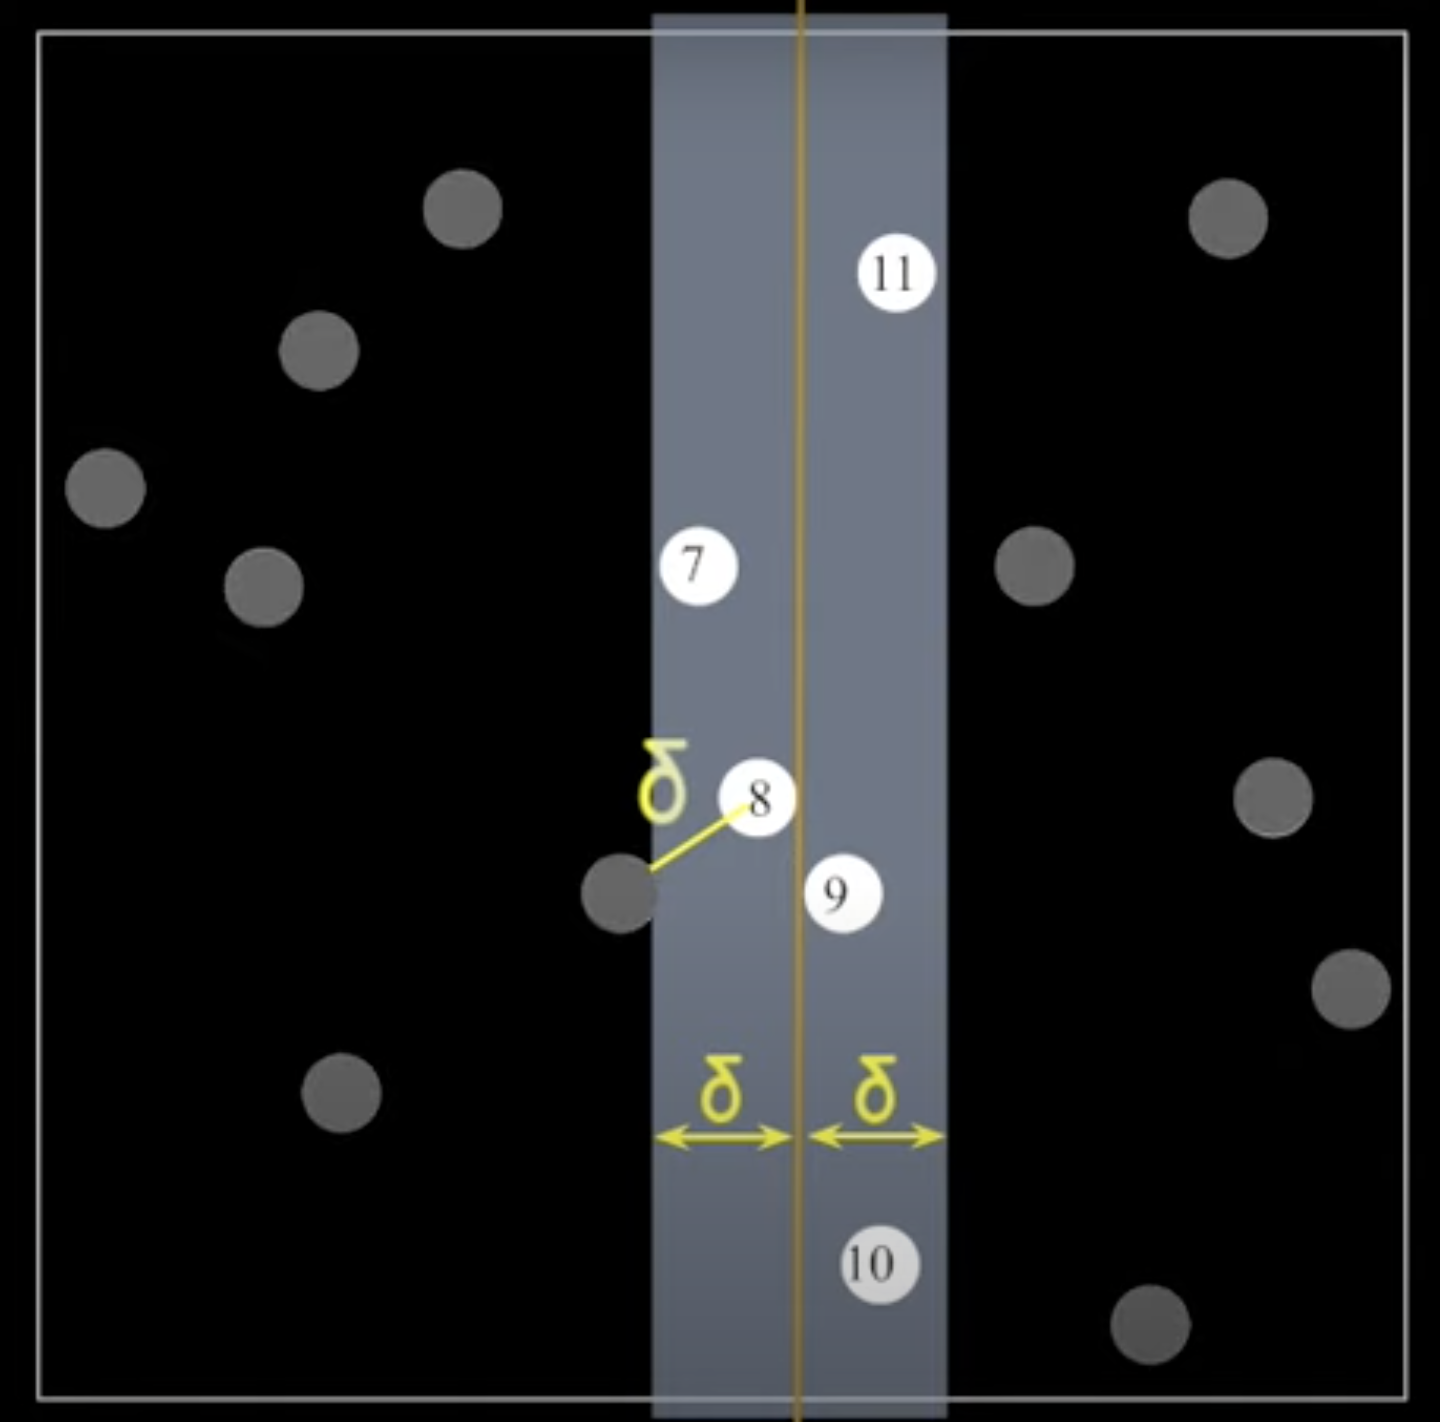

- We have compared all points within the left region, and all points within the right region. So there are 2 possibilities
    1. The shortest distance is $\min(d_1, d_2)$
    2. There is a shorter distance $d_{new}$ after we combine the left and right regions 

- If Case 1, then we simply return $\min(d_1, d_2)$

- If Case 2
    - If a shorter distance emerges after comparing the left and right regions, and the shorter region is not $\min(d_1, d_2)$, then it **must** be the case that one of the points is in the left region, and one of the point is in the right. Because we have compared all other pairs!
    - For this to be true, then the 2 points cannot be more than $d = \min(d_1, d_2)$ distance away from the partition line
    - Because it is more than $d$ distance away, then the nearest it can be to a point from the opposite region is greater than $d$, so it cannot be shorter
        - i.e. in the picture above, if the point 7 were outside of the region $\delta$, then the nearest point to 7 from the opposite region must be more than $\delta$ distance away
    - Therefore, once we find the partitioning line, we only need to consider a region $x \in \pm 2 \cdot d$ around it to find a possible smaller distance


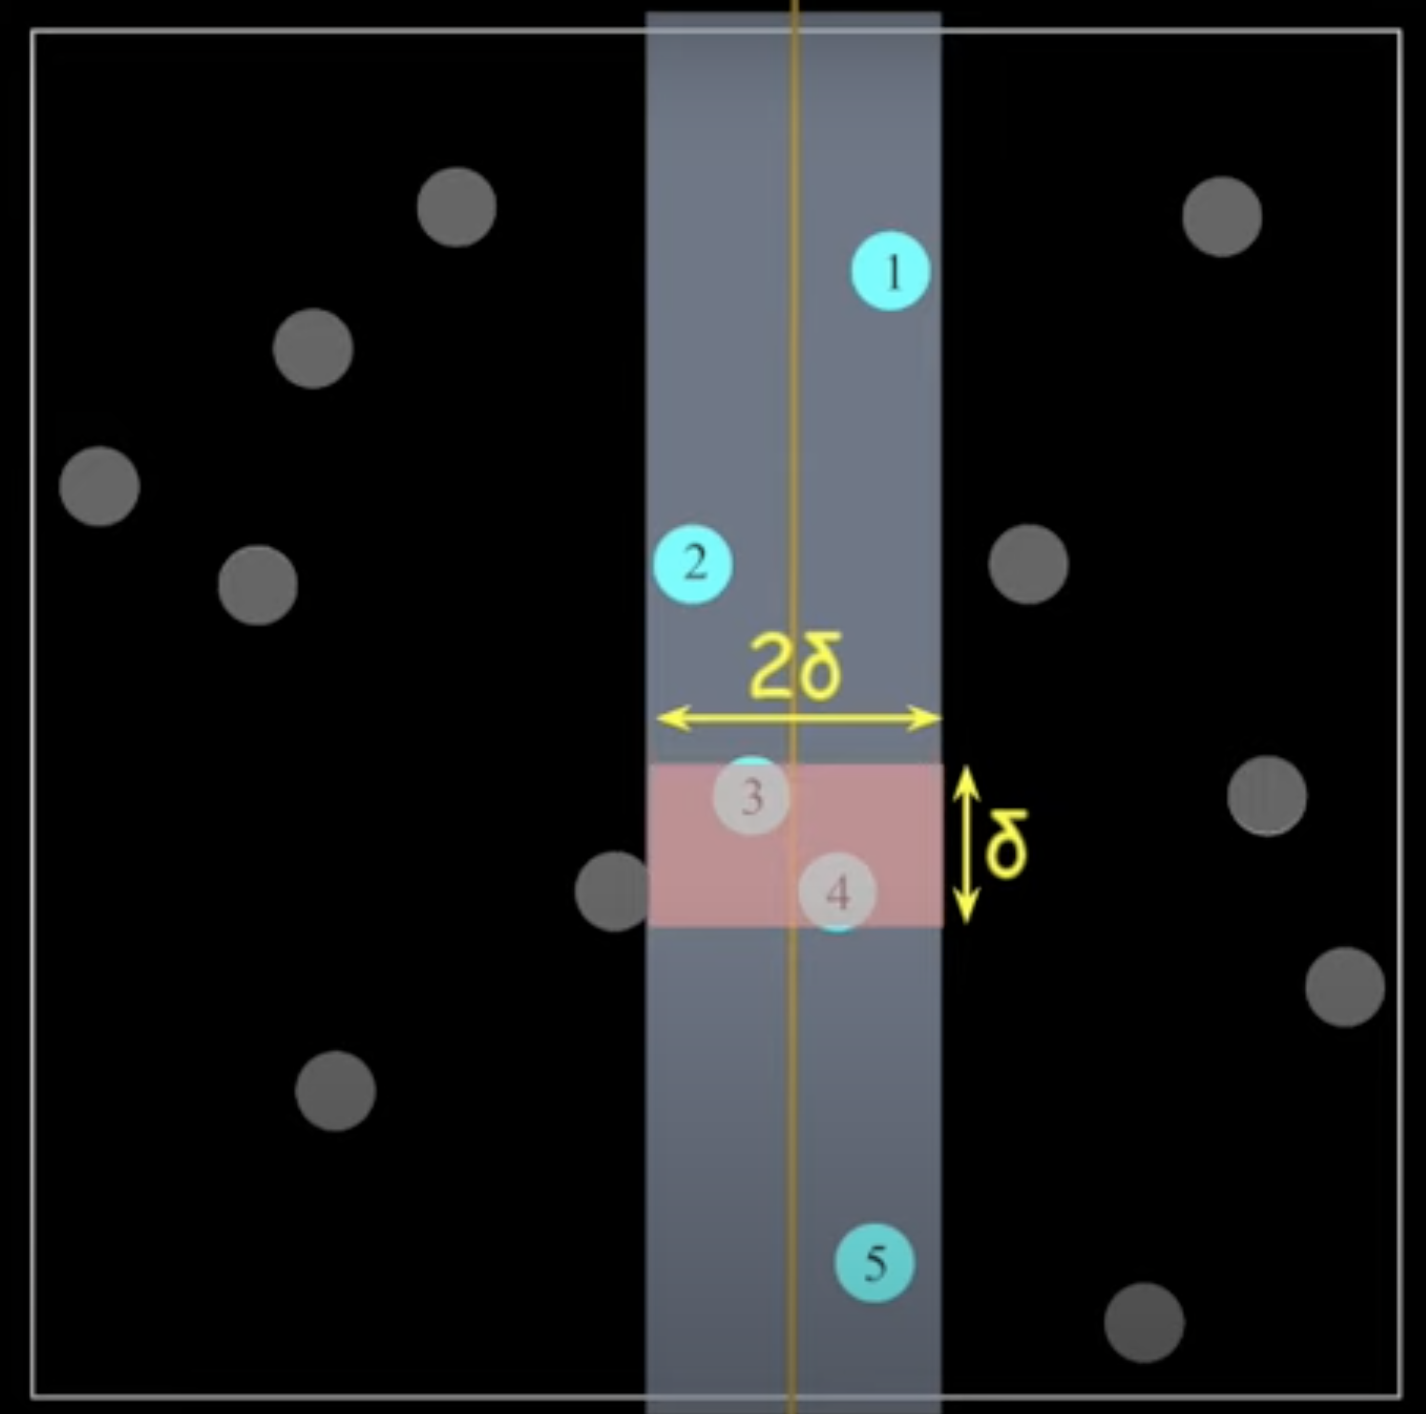

- We have limited our search to the region bounded by $\min(d_1, d_2)$. However, a pairwise comparison of this region is still $O(n^2)$ time complexity! Can we do better?

- As it turns out, we can! 
    - First, looping over all points in this region is unavoidable. So we start by looping over every point from the highest to the lowest 
        - This incurs $O(N)$ 
    - For any given point, we don't actually need to compare them with every other point in the region. Rather we only need to compare them with points that are at most $\min(d_1, d_2)$ away from it vertically. 
    - So for each point, we only need to compare within the $2 \delta$ region on the x axis, and a $\delta$ region on the $y$ axis$. This is the $(2 \delta, \delta)$ box delineated in the screenshot above 
    - For any given point, there are at most 7 points to compare. 

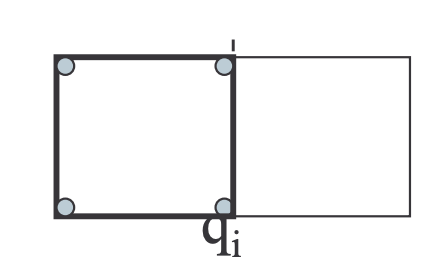

- Why is that last statement true?
    - We already know that on the left of the partition and the right of the partition, points must be **at least** $d$ distance apart
    - There can't be anything less than $d$ distance apart on the same side, because if there were, the shorter distance would have been less than $d$
    - So from $q_i$, there are at most 4 other points on the LHS to compare against (including itself). If there were more, it creates a pair less than $d$ apart, which is a contradiction
    - By symmetric argument, there are at most 4 points on the RHS to compare
    - Hence, the maximum number of points to compare against is $4 * 2 - 1 = 7$ 
        - -1 because you compare point against itself twice

- So the loop over all points in the region is $O(N)$, and the comparison with other points is at most $O(7)$, which makes this comparison a total of $O(N)$

- Performance
    - We perform $\log(N)$ recursive calls
    - In each call
        - We start by sorting the loop $O(N \log(N))$
        - Then once we derive the middle band $\delta$, we loop over all points in the middle band $O(N) * O(7)$
        - So in each loop, total work done is $O(N \log(N)) + O(7N) \approx O(N \log(N))$
    - This gives us an overall time complexity of $O(\log(N) \cdot N \cdot \log(N)) = O(N \log^2(N))$

- To make this even more efficient, instead of calling `sort` for every recursive call, just sort the inputs once and reuse it in the recursion. 
    

In [29]:
from collections import namedtuple
from itertools import combinations
from math import sqrt
import numpy as np


Point = namedtuple('Point', 'x y')

def distance_squared(first_point, second_point):
    # return np.sqrt((first_point.x - second_point.x) ** 2 + (first_point.y - second_point.y) ** 2)
    return (first_point.x - second_point.x) ** 2 + (first_point.y - second_point.y) ** 2


def minimum_distance_dnc(points_sorted, return_points = False):
    if len(points_sorted) in [0,1]:
        if return_points:
            return np.inf, None, None
        return np.inf

    if len(points_sorted) == 2:
        if return_points:
            return distance_squared(points_sorted[0], points_sorted[1]), points_sorted[0], points_sorted[1]
        return distance_squared(points_sorted[0], points_sorted[1])
        
    mid_index = len(points_sorted)//2
    if return_points:
        min_dist_left, smallest_distance_point1, smallest_distance_point2 = minimum_distance_dnc(points_sorted[:mid_index])
        min_dist_right, smallest_distance_point1, smallest_distance_point2 = minimum_distance_dnc(points_sorted[mid_index:])
    else:
        min_dist_left = minimum_distance_dnc(points_sorted[:mid_index])
        min_dist_right = minimum_distance_dnc(points_sorted[mid_index:])

    min_dist = min(min_dist_left, min_dist_right)

    points_sorted_filtered = [p for p in points_sorted if np.abs(points_sorted[mid_index].x - p.x) <= min_dist]
    points_sorted_filtered = sorted(points_sorted_filtered, key=lambda p: p.y)

    for i in range(len(points_sorted_filtered)):
        for j in range(i+1, min(i+6, len(points_sorted_filtered))):
            if distance_squared(points_sorted_filtered[i], points_sorted_filtered[j]) < min_dist:
                #print(distance_squared(points_sorted_filtered[i], points_sorted_filtered[j]))
                min_dist = distance_squared(points_sorted_filtered[i], points_sorted_filtered[j])
                smallest_distance_point1 = points_sorted_filtered[i]
                smallest_distance_point2 = points_sorted_filtered[j]
    
    if return_points:
        return min_dist, smallest_distance_point1, smallest_distance_point2
    return min_dist

input_points = [
    Point(4,4),
    Point(-2,-2),
    Point(-3,-4),
    Point(-1,3),
    Point(2,3),
    Point(-4,0),
    Point(1,1),
    Point(-1,-1),
    Point(3,-1),
    Point(-4,2),
    Point(-2,4),
]
points_sorted = sorted(input_points, key=lambda p: (p.x, p.y))
minimum_distance_dnc(points_sorted)

2

In [38]:
# distance_squared(Point(-2,-2), Point(-1,-1))
abs(3-20)
import math
math.inf

inf